# Neural Network Demo w/ MNIST Dataset

[The MNIST dataset](https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/) contains a bunch of small images of handwritten numbers (0-9). 

Let's train a neural network to classify them...

#### Import Dependencies

In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#### Load the dataset

We want to split our datasets into training sets and test sets.
The training sets are used for training, and the test sets are what we'll use to evaluate the model that we build. Note that we should *never* train on our test set, these should be images that the model has never seen!

In [44]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#### Peek at the data

A good first step is always to know what you're working with. The dataset is in the form of a `numpy` array, which has some helpful methods we can use. Numpy is a python package that makes working with arrays fast and easy.

`x_train.shape` will tell us the dimensionality of our dataset.

In [45]:
x_train.shape

(60000, 28, 28)

This is telling us that our array is a $60000 \times 28 \times 28$ multi-dimensional array (or matrix).

What this is telling us is that there are 60,000 images that are $28 \times 28$ pixels.

##### Example Image

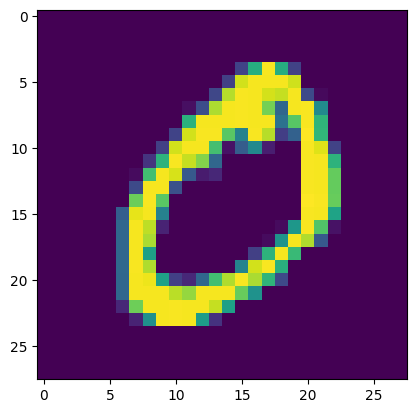

In [46]:
# plt.imshow can take in a 2 or 3 dimensional array and plot it as an image.
plt.imshow(x_train[1])
plt.show()

In [47]:
# display the corresponding label
y_train[1]

np.uint8(0)

#### *(Side Note)*

Our loss function does some fancy stuff that treats the single number as an index of an array equal to the dimensionality of the output layer (10).

So it will turn the 0 into `[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]`

This just makes our lives easier.

In [48]:
model = tf.keras.models.Sequential([
  # the Input layer defines what each single sample will be
  tf.keras.layers.Input(shape=(28, 28, 1)),
  # this layer takes the numpy array of shape (28, 28, 1) and flattens
  # it to be a shape of (784,)
  tf.keras.layers.Flatten(),
  # Dense layers (aka 'linear' layer) has a weight 
  # that maps each and every input to each and every output.
  # 
  # We also add a 'relu' activation function that adds 'non-linearity' 
  # to our network.
  # Experiment with different activations!
  tf.keras.layers.Dense(128, activation='relu'),
  # Experiment with adding more layers!
  tf.keras.layers.Dense(64, activation='relu'),
  # Our output must match the dimensionality of our labels
  # and our labels will be expanded to have a shape of (10,).
  # So, our last layer must have a shape of 10.
  # The softmax activation ensures that the output will sum to 1,
  # meaning our output will be every element in the array as a
  # probability
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    # 'sparse' means representing the array as an index
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    x_train,
    y_train,
    batch_size=32,  # change this?
    epochs=6,       # change this?
    validation_data=(x_test, y_test)
)

Epoch 1/6


/Users/lukeharwood/code/maic/venv/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.2133 - sparse_categorical_accuracy: 0.7925 - val_loss: 0.3832 - val_sparse_categorical_accuracy: 0.9107
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3279 - sparse_categorical_accuracy: 0.9168 - val_loss: 0.3137 - val_sparse_categorical_accuracy: 0.9248
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2257 - sparse_categorical_accuracy: 0.9397 - val_loss: 0.1994 - val_sparse_categorical_accuracy: 0.9471
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1627 - sparse_categorical_accuracy: 0.9547 - val_loss: 0.1914 - val_sparse_categorical_accuracy: 0.9499
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1436 - sparse_categorical_accuracy: 0.9597 - val_loss: 0.1679 - val_sparse_categorical_accuracy: 0.9554
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1256 - sparse_categorical_accuracy: 0.9651 - val_loss: 0.1904 - val_sparse_categorical_accuracy: 0.9549


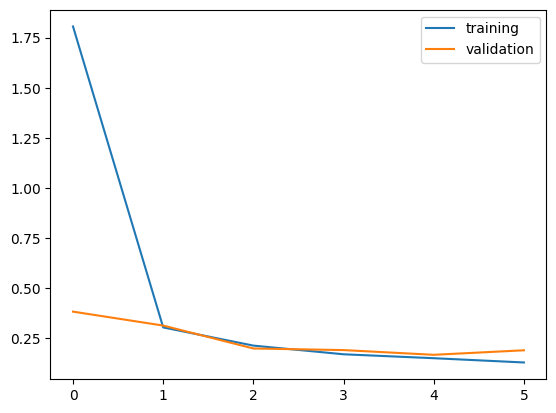

In [ ]:
# plt.plot() takes in a list of values and plots it
plt.plot(history.history["loss"], label="training")
plt.plot(history.history["val_loss"], label="validation")

# try creating a plot for accuracy!

plt.legend() # add the legend to the upper right hand corner
plt.show()

### Let's see the results!

First let's pick a random number from the test set.

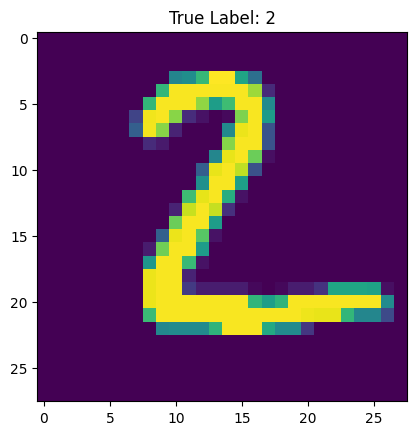

In [ ]:
# let's try this image
idx = 1
test_image = x_test[idx]
plt.imshow(test_image)
plt.title(f"True Label: {y_test[idx]}")
plt.show()

We can use `model.predict()` to run 'inference' on our data to classify it.

Remember, our output can be treated as a probability (between 0-1) so we can multiply each by 100 to see it as a percentage.

In [60]:
# predict takes in a batch of inputs (hence needing to reshape it)
prediction = model.predict(test_image.reshape((1, 28, 28)))
print("===================================================================")
print("Raw prediction output:")
# this is the raw output from the model (grab the first/only output)
print(prediction[0])
print("===================================================================")

print("===================================================================")
print("Formatted output:")
for label, probability in enumerate(model.predict(test_image.reshape((1, 28, 28)))[0]):
    print(f"{label} - {probability*100:.3f}%")
print("===================================================================")

# to view this as a single value, we can use np.argmax to give us the index
# of the value that is the highest (which is our prediction)
print(f"\nThe number is a {np.argmax(prediction[0])}.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Raw prediction output:
[1.38662110e-15 2.20079539e-14 1.00000000e+00 1.18632020e-08
 4.60066013e-14 1.01086513e-16 1.25210204e-21 8.78053630e-10
 1.60730817e-13 3.65412690e-21]
Formatted output:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
0 - 0.000%
1 - 0.000%
2 - 100.000%
3 - 0.000%
4 - 0.000%
5 - 0.000%
6 - 0.000%
7 - 0.000%
8 - 0.000%
9 - 0.000%

The number is a 2.


Our model is 100.00% convinced it's a 2! Which is correct:)

## Further Exploration

1. Try modifying some of the hyperparameters of our model (e.g. the learning rate, batch size, activation functions, epochs, etc.). Add/remove layers to the network and see how it does.
3. Predict the entire test set, and visualize examples where it's wrong, what is messing it up?
4. Try using a CNN architecture! I'd reccomend getting a CNN working on this simpler dataset before trying it on the CIFAR-100 dataset. ([Tensorflow Conv2D Docs](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D))
5. Once you're getting good validation/test accuracy, what other layers can we add to help boost accuracy, or reduce overfitting? You'll have to research this...